In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('data/xdata.csv', ';')

In [5]:
data.head()

,Timestamp,610FI001.DACA.PV,610FI005.DACA.PV,610FI015.DACA.PV,610FI017A.PV,610FI017B.PV,610FI017C.PV,610FI020.PV,610FI023A.PV,610FI023B.PV,...,Param1,Param2,Param3,Param4,Param5,Param6,Param7,Param8,Param9,Param10
0,2018-09-28 20:00:00,6767.059487,3915.980352,6488.320318,7378.070513,7401.434551,7368.363223,235425.40625,37094.747564,41896.374375,...,102.480702,999.576371,1002.109174,11.380535,10.892793,77.732925,0.0,51.094552,48.905448,0.0
1,2018-09-29 08:00:00,6765.877464,1327.084508,6491.123816,7378.806800,7398.244902,7363.662715,235425.40625,36857.208869,42294.850312,...,102.480702,999.576371,1002.109174,11.380908,10.889553,77.736564,0.0,51.094552,48.905448,0.0
2,2018-09-29 20:15:00,6770.346529,6255.144424,6486.659397,7379.145501,7398.580645,7364.334297,235425.40625,37815.427267,42395.268750,...,102.480702,999.576371,1002.109174,11.377843,10.888383,77.734026,0.0,51.094552,48.905448,0.0
3,2018-09-30 08:00:00,6775.414762,274.236670,6501.651024,7378.688996,7426.280020,7392.369297,235425.40625,37709.016759,43039.450156,...,102.480702,999.576371,1002.109174,11.378230,10.891634,77.726824,0.0,51.094552,48.905448,0.0
4,2018-09-30 20:00:00,6775.592058,2045.991153,6516.385240,7377.996880,7382.128965,7347.546758,235425.40625,38053.489369,42279.893906,...,102.480702,999.576371,1002.109174,11.380795,10.888861,77.726054,0.0,51.094552,48.905448,0.0


In [6]:
params = data.iloc[:, -10:]
data = data.iloc[:, 7 * 10: 8 * 10]

### Посмотрим пропущенные значения

In [7]:
cols_with_missing = [col for col in data.columns
                     if data[col].isnull().any()]


In [8]:
cols_with_missing

[]

##### Таких значений нет

### Посмотрим среднее значение по столбцам и дисперсию

In [9]:
import matplotlib.pyplot as plt
print(data.shape[1])
len(data.mean(axis=0))

10


10

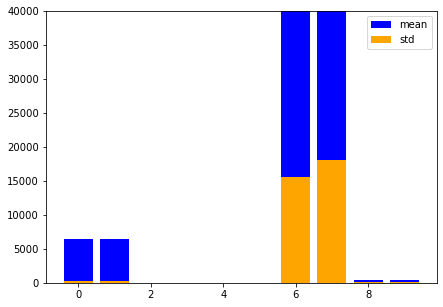

In [10]:

fig, axs = plt.subplots(figsize = (7, 5))
plt.bar(range(data.shape[1]), data.mean(axis=0), color = 'blue', label = 'mean')
plt.bar(range(data.shape[1]), data.std(axis=0), color = 'orange', label = 'std')
axs.legend()
axs.set_ylim([0,40000])

plt.show()

In [11]:
cols_with_zeroes = [col for col in data.columns
                     if data[col].mean() == 0 and data[col].sum() == 0]
cols_with_zeroes # колонки с нулями, можно их удалить

['610FI501A.DACA.PV',
 '610FI501B.DACA.PV',
 '610FI502A.DACA.PV',
 '610FI502B.DACA.PV']

In [12]:
len(cols_with_zeroes) 

4

In [13]:
data = data.drop(cols_with_zeroes, axis = 1)

NameError: name 'coloumn' is not defined

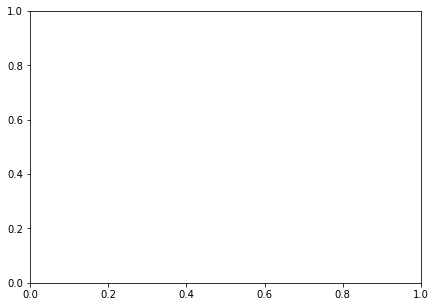

In [14]:
import numpy as np
import scipy.stats as stats


fig, axs = plt.subplots(figsize = (7, 5))
plt.plot(range(len(data.mean())), data.mean(), color = 'blue', label = coloumn)

axs.legend()


plt.show()


#  средние значения по колонкам

### Посмотрим на каждую колонку по отдельности

In [ ]:
for coloumn in data.columns:
    fig, axs = plt.subplots(figsize = (7, 5))
    plt.scatter(range(data.shape[0]), data[coloumn], color = 'blue', label = coloumn)
    plt.plot(data[coloumn].rolling(window=70).mean(), color = 'orange', label = 'exponential wighted averages')
    axs.legend()
#     axs.set_ylim([0,40000])

    plt.show()

``` Данные достаточно шумные, но экспоненциальное срдневзвешенное показывает общий тренд ```

### Теперь посмотрим на корреляцию столбцов

In [ ]:
f = plt.figure(figsize=(7, 7))
plt.matshow(data.corr(), fignum=f.number)
plt.xticks(range(data.shape[1]), data.columns, fontsize=14, rotation=80)
plt.yticks(range(data.shape[1]), data.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

```Заметим, что парные признаки очень сильно коррелируют```

### Общие сведения по таблице

In [ ]:
data.describe()

# Обучаем модель

In [ ]:
target = pd.read_csv('ts.csv', ';')

In [ ]:
target.head()

In [ ]:
params

### Также посмотрим на признаки

In [ ]:
for coloumn in params.columns:
    fig, axs = plt.subplots(figsize = (7, 5))
    plt.scatter(range(params.shape[0]), params[coloumn], color = 'blue', label = coloumn)
    plt.plot(params[coloumn].rolling(window=70).mean(), color = 'orange', label = 'exponential wighted averages')
    axs.legend()
#     axs.set_ylim([0,40000])

    plt.show()

``` Опять же, почти все параметры очень шумные ```

### Взглянем на корреляцию

In [ ]:
f = plt.figure(figsize=(7, 7))
plt.matshow(params.corr(), fignum=f.number)
plt.xticks(range(params.shape[1]), params.columns, fontsize=14, rotation=80)
plt.yticks(range(params.shape[1]), params.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

```Признак 2 сильно коррелирует с 3, поэтому один из них можно удалить, также с признаками 4 и 5```


In [ ]:
params.drop(['Param3', 'Param5'], axis = 1, inplace = True)

#### Разделим данные на train и test

In [ ]:
import sklearn.model_selection as sk
X_train, X_test, y_train, y_test = sk.train_test_split(params, \
                                                      target['ts'] , test_size=0.3, random_state=42)

### Обучим CatBoost со стандартными параметрами и кастомной метрикой MAE

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(custom_metric= 'MAE')
model.fit(
   X_train, y_train,
   eval_set=(X_test, y_test),
)